<img src="https://ga-dash.s3.amazonaws.com/production/assets/logo-9f88ae6c9c3871690e33280fcf557f33.png" style="float: left; margin: 15px;">

# PCA on speed dating data

Week **6 ** | Lab **1.1 **


---

In this more detailed codealong/lab we are going to practice PCA. 

Considering how often people use PCA to simplify their data, reduce noise in their data, and find unmeasured "latent variables", it is important to spend the time to understand what's going on.

---

### Dataset

The dataset we are using for this lab is a subset of the [much more detailed speed dating dataset](https://www.kaggle.com/annavictoria/speed-dating-experiment). In particular, this contains no information on the actual speed dating itself (successes with or opinions of other individuals). It also contains no "follow-up" information where individuals are re-asked the same questions about themselves. All it contains are things that an individual enjoys doing, their ratings of themselves on how desireable they are, and how they think others rate them on desireability.

Specifically, the columns in the data are outlined below:

    subject_id                   :   unique individual identifier
    like_sports                  :   enjoyment of participating in sports
    like_tvsports                :   enjoyment of watching sports on tv
    like_exercise                :   enjoyment of exercise
    like_food                    :   enjoyment of food
    like_museums                 :   enjoyment of museums
    like_art                     :   enjoyment of art
    like_hiking                  :   enjoyment of hiking
    like_gaming                  :   enjoyment of pl aying games
    like_clubbing                :   enjoyment of going clubbing/partying
    like_reading                 :   enjoyment of reading
    like_tv                      :   enjoyment of tv in general
    like_theater                 :   enjoyment of the theater (plays, musicals, etc.)
    like_movies                  :   enjoyment of movies
    like_concerts                :   enjoyment of concerts
    like_music                   :   enjoyment of music
    like_shopping                :   enjoyment of shopping
    like_yoga                    :   enjoyment of yoga
    subjective_attractiveness    :   how attractive they rate themselves
    subjective_sincerity         :   how sincere they rate themselves
    subjective_intelligence      :   how intelligent they rate themselves
    subjective_fun               :   how fun they rate themselves
    subjective_ambition          :   how ambitious they rate themselves
    objective_attractiveness     :   percieved rating others would give them on how attractive they are
    objective_sincerity          :   percieved rating others would give them on how sincere they are
    objective_intelligence       :   percieved rating others would give them on how intelligent they are
    objective_fun                :   percieved rating others would give them on how fun they are
    objective_ambition           :   percieved rating others would give them on how ambitious they are
    
There are 551 subjects total.

---

### Load packages

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

sns.set_style("whitegrid")

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
from sklearn.decomposition import PCA

---

### Load and clean speed dating data

In [4]:
sd = pd.read_csv('~/DSI-SF-5/datasets/speed_dating/speed_dating_user_attributes.csv')

In [5]:
sd.columns

Index([u'subject_id', u'wave', u'like_sports', u'like_tvsports',
       u'like_exercise', u'like_food', u'like_museums', u'like_art',
       u'like_hiking', u'like_gaming', u'like_clubbing', u'like_reading',
       u'like_tv', u'like_theater', u'like_movies', u'like_concerts',
       u'like_music', u'like_shopping', u'like_yoga',
       u'subjective_attractiveness', u'subjective_sincerity',
       u'subjective_intelligence', u'subjective_fun', u'subjective_ambition',
       u'objective_attractiveness', u'objective_sincerity',
       u'objective_intelligence', u'objective_fun', u'objective_ambition'],
      dtype='object')

In [6]:
sd.head(3)

,subject_id,wave,like_sports,like_tvsports,like_exercise,like_food,like_museums,like_art,like_hiking,like_gaming,...,subjective_attractiveness,subjective_sincerity,subjective_intelligence,subjective_fun,subjective_ambition,objective_attractiveness,objective_sincerity,objective_intelligence,objective_fun,objective_ambition
0,1,1,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,...,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN
1,2,1,3.0,2.0,7.0,10.0,8.0,6.0,3.0,5.0,...,7.0,5.0,8.0,10.0,3.0,NaN,NaN,NaN,NaN,NaN
2,3,1,3.0,8.0,7.0,8.0,5.0,5.0,8.0,4.0,...,8.0,9.0,9.0,8.0,8.0,NaN,NaN,NaN,NaN,NaN


In [7]:
sd.isnull().sum()

subject_id                     0
wave                           0
like_sports                    7
like_tvsports                  7
like_exercise                  7
like_food                      7
like_museums                   7
like_art                       7
like_hiking                    7
like_gaming                    7
like_clubbing                  7
like_reading                   7
like_tv                        7
like_theater                   7
like_movies                    7
like_concerts                  7
like_music                     7
like_shopping                  7
like_yoga                      7
subjective_attractiveness      9
subjective_sincerity           9
subjective_intelligence        9
subjective_fun                 9
subjective_ambition            9
objective_attractiveness     237
objective_sincerity          237
objective_intelligence       237
objective_fun                237
objective_ambition           237
dtype: int64

In [8]:
sd.drop(['objective_attractiveness','objective_sincerity',
         'objective_intelligence','objective_fun','objective_ambition'],
        axis=1, inplace=True)

In [9]:
sd.dropna(inplace=True)

In [10]:
sd.isnull().sum()

subject_id                   0
wave                         0
like_sports                  0
like_tvsports                0
like_exercise                0
like_food                    0
like_museums                 0
like_art                     0
like_hiking                  0
like_gaming                  0
like_clubbing                0
like_reading                 0
like_tv                      0
like_theater                 0
like_movies                  0
like_concerts                0
like_music                   0
like_shopping                0
like_yoga                    0
subjective_attractiveness    0
subjective_sincerity         0
subjective_intelligence      0
subjective_fun               0
subjective_ambition          0
dtype: int64

---

### Subset the subjective columns and visualize the variables

In [11]:
subjective_cols = [col for col in sd.columns if col.startswith('subjective')]
print subjective_cols

subjective = sd[subjective_cols]
subjective = (subjective - subjective.mean()) / subjective.std()

['subjective_attractiveness', 'subjective_sincerity', 'subjective_intelligence', 'subjective_fun', 'subjective_ambition']


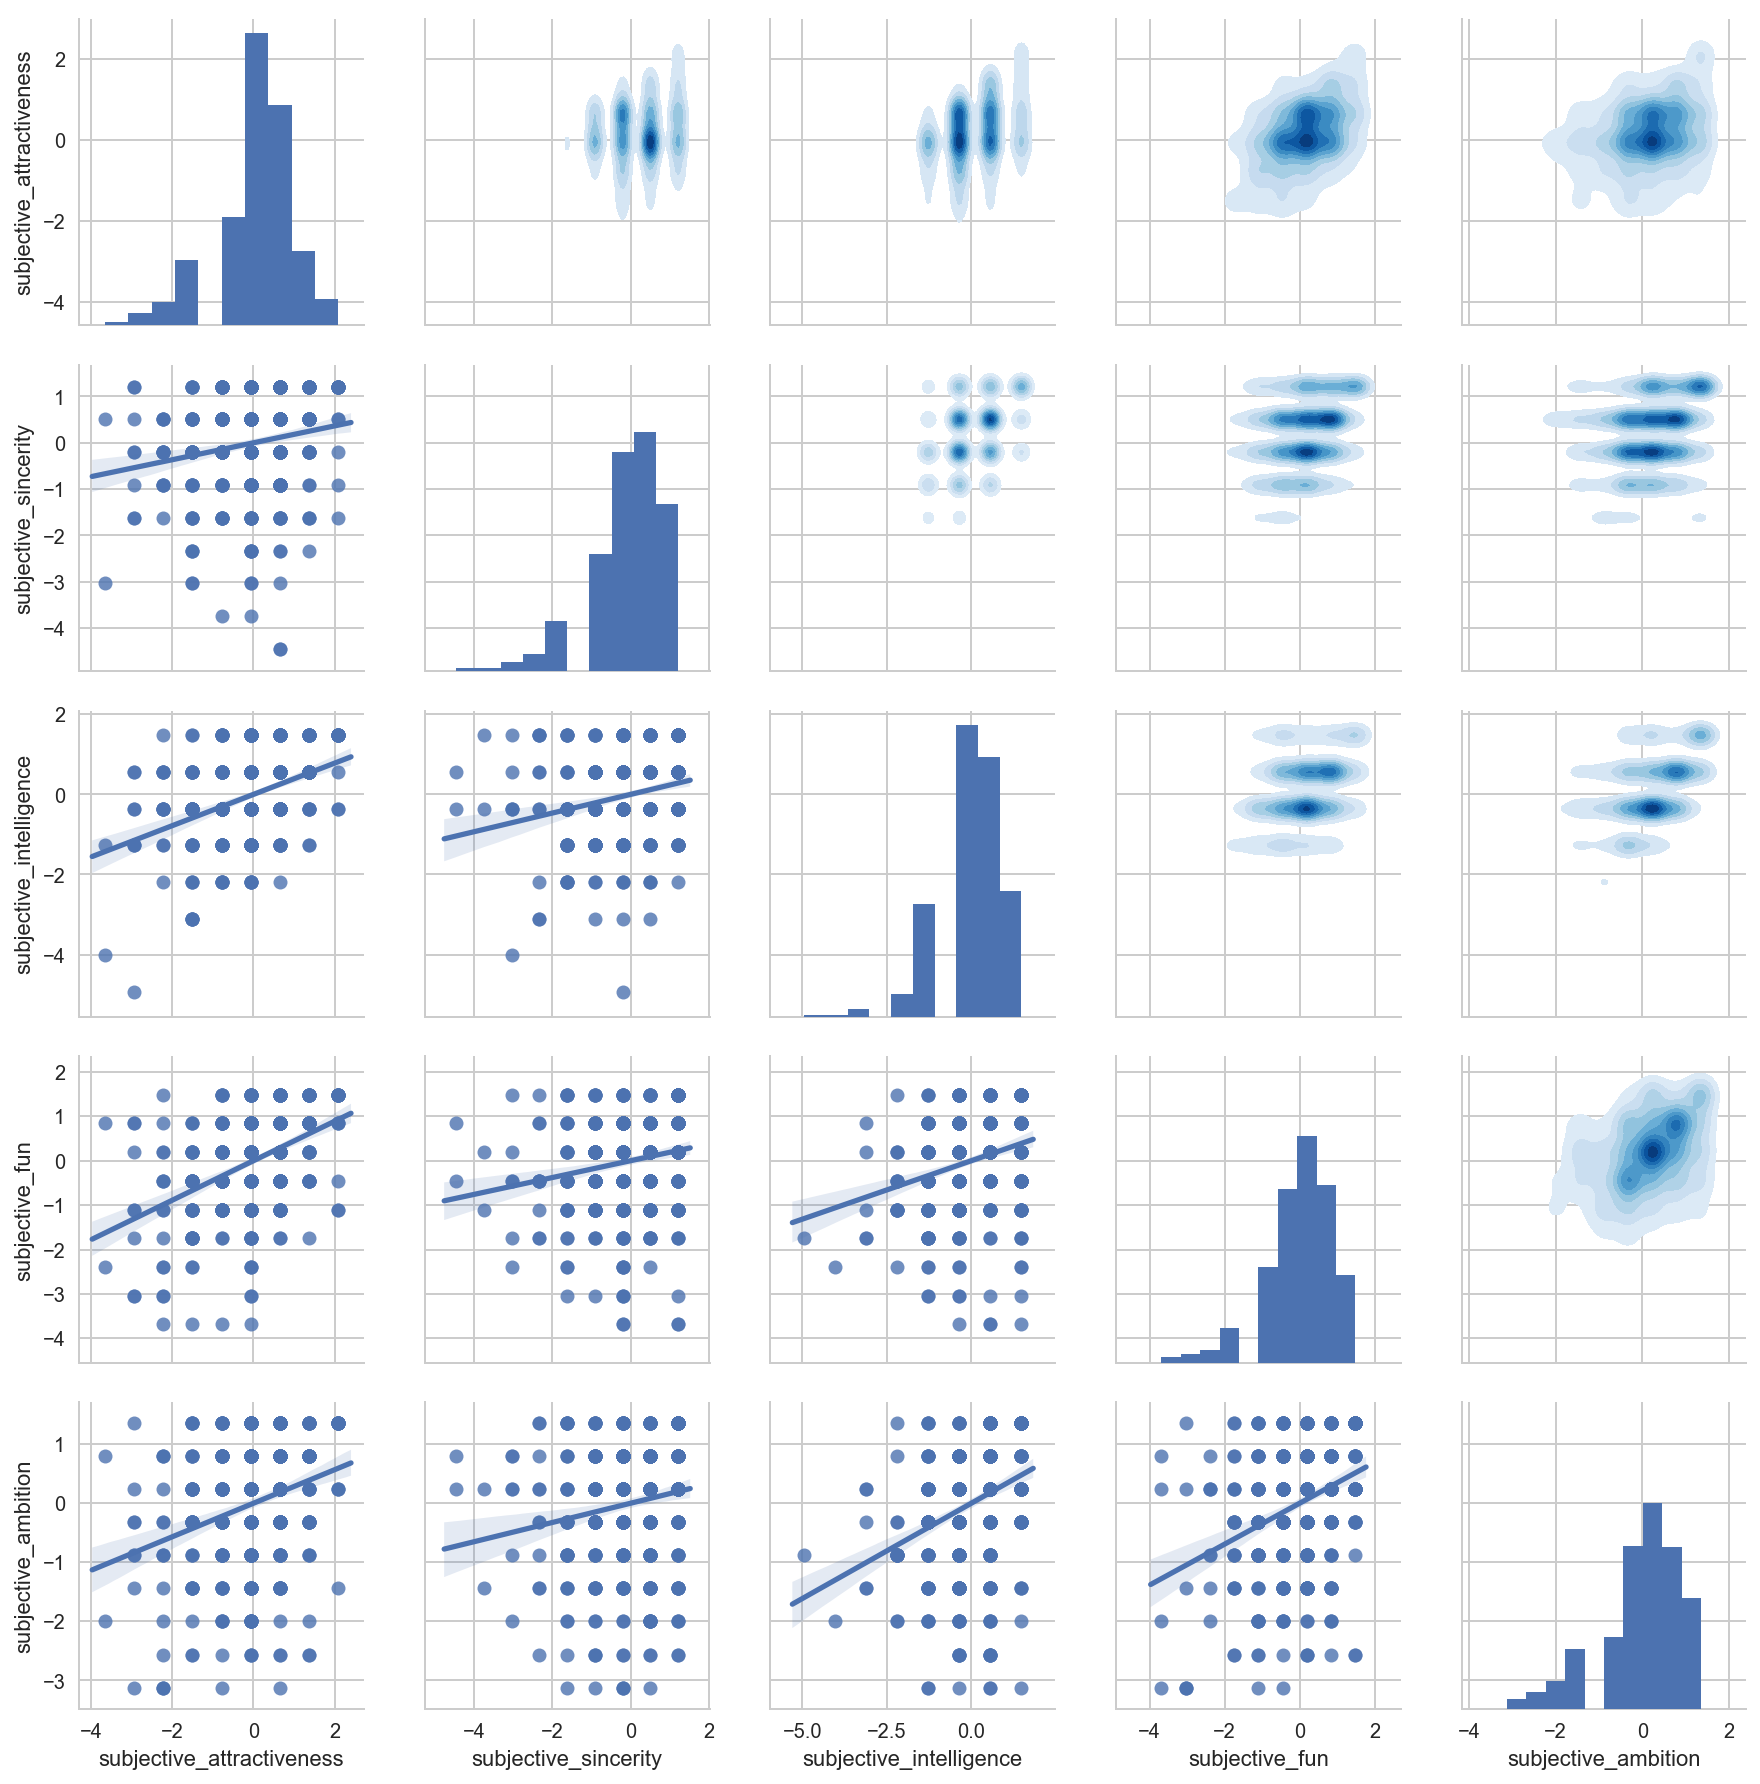

In [12]:
g = sns.PairGrid(subjective)
g = g.map_lower(sns.regplot)
g = g.map_upper(sns.kdeplot, cmap="Blues", shade=True, shade_lowest=False)
g = g.map_diag(plt.hist)

plt.show()

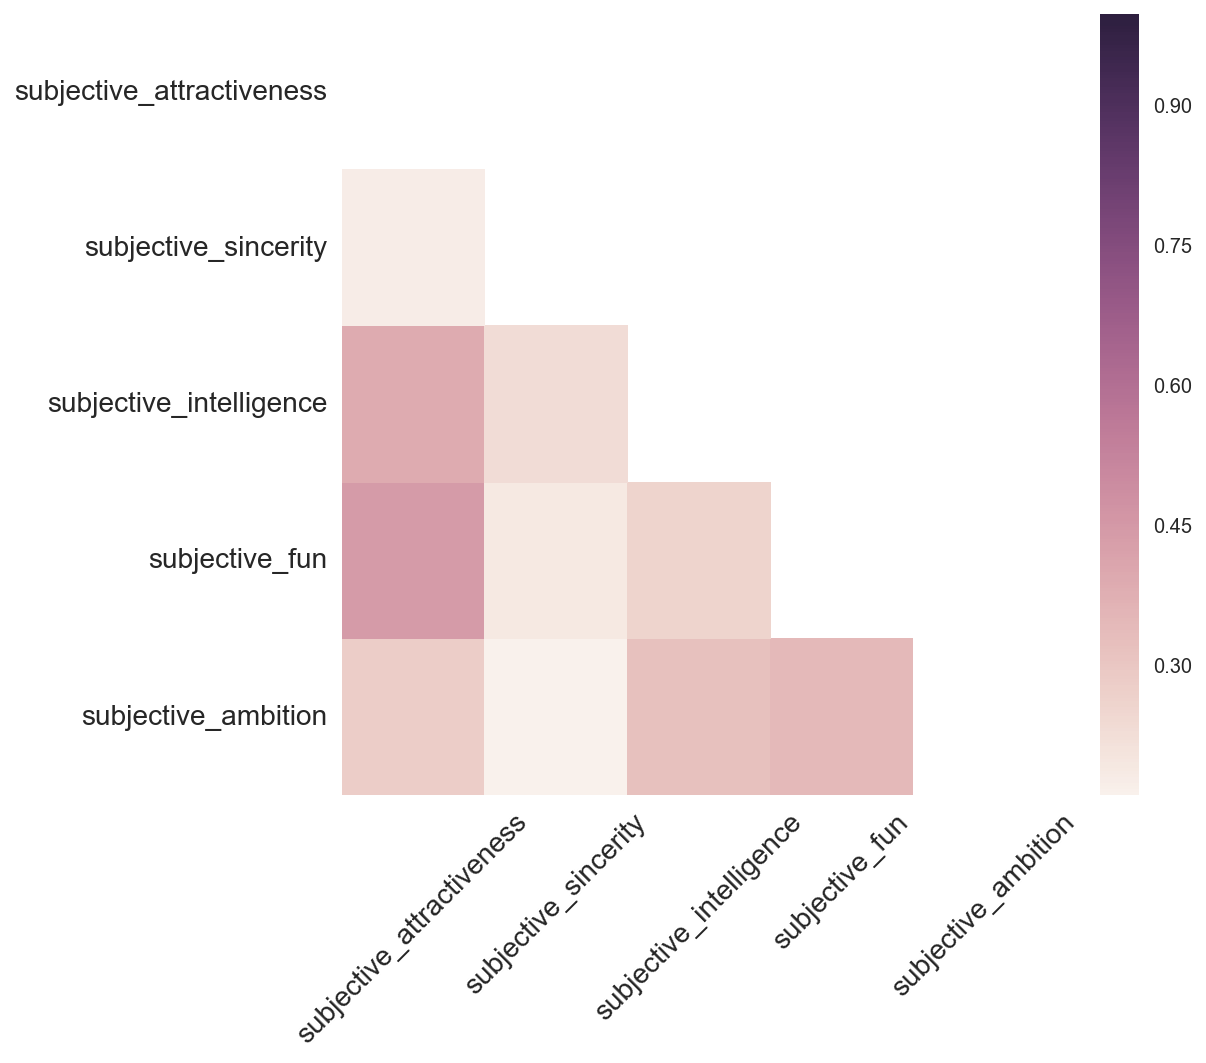

In [12]:
subj_corr = subjective.corr()

# Generate a mask for the upper triangle (taken from seaborn example gallery)
mask = np.zeros_like(subj_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

fig, ax = plt.subplots(figsize=(8,7))

# Plot the heatmap with seaborn.
# Assign the matplotlib axis the function returns. This will let us resize the labels.
ax = sns.heatmap(subj_corr, mask=mask)

# Resize the labels.
ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=14, rotation=45)
ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=14, rotation=0)

# If you put plt.show() at the bottom, it prevents those useless printouts from matplotlib.
plt.show()

---

### Subset and visualize some preference variables

In [13]:
sd.columns

Index([u'subject_id', u'wave', u'like_sports', u'like_tvsports',
       u'like_exercise', u'like_food', u'like_museums', u'like_art',
       u'like_hiking', u'like_gaming', u'like_clubbing', u'like_reading',
       u'like_tv', u'like_theater', u'like_movies', u'like_concerts',
       u'like_music', u'like_shopping', u'like_yoga',
       u'subjective_attractiveness', u'subjective_sincerity',
       u'subjective_intelligence', u'subjective_fun', u'subjective_ambition'],
      dtype='object')

In [14]:
like_cols = ['like_tvsports','like_sports','like_museums','like_theater','like_shopping']
sd_like = sd[like_cols]

sd_like = (sd_like - sd_like.mean()) / sd_like.std()

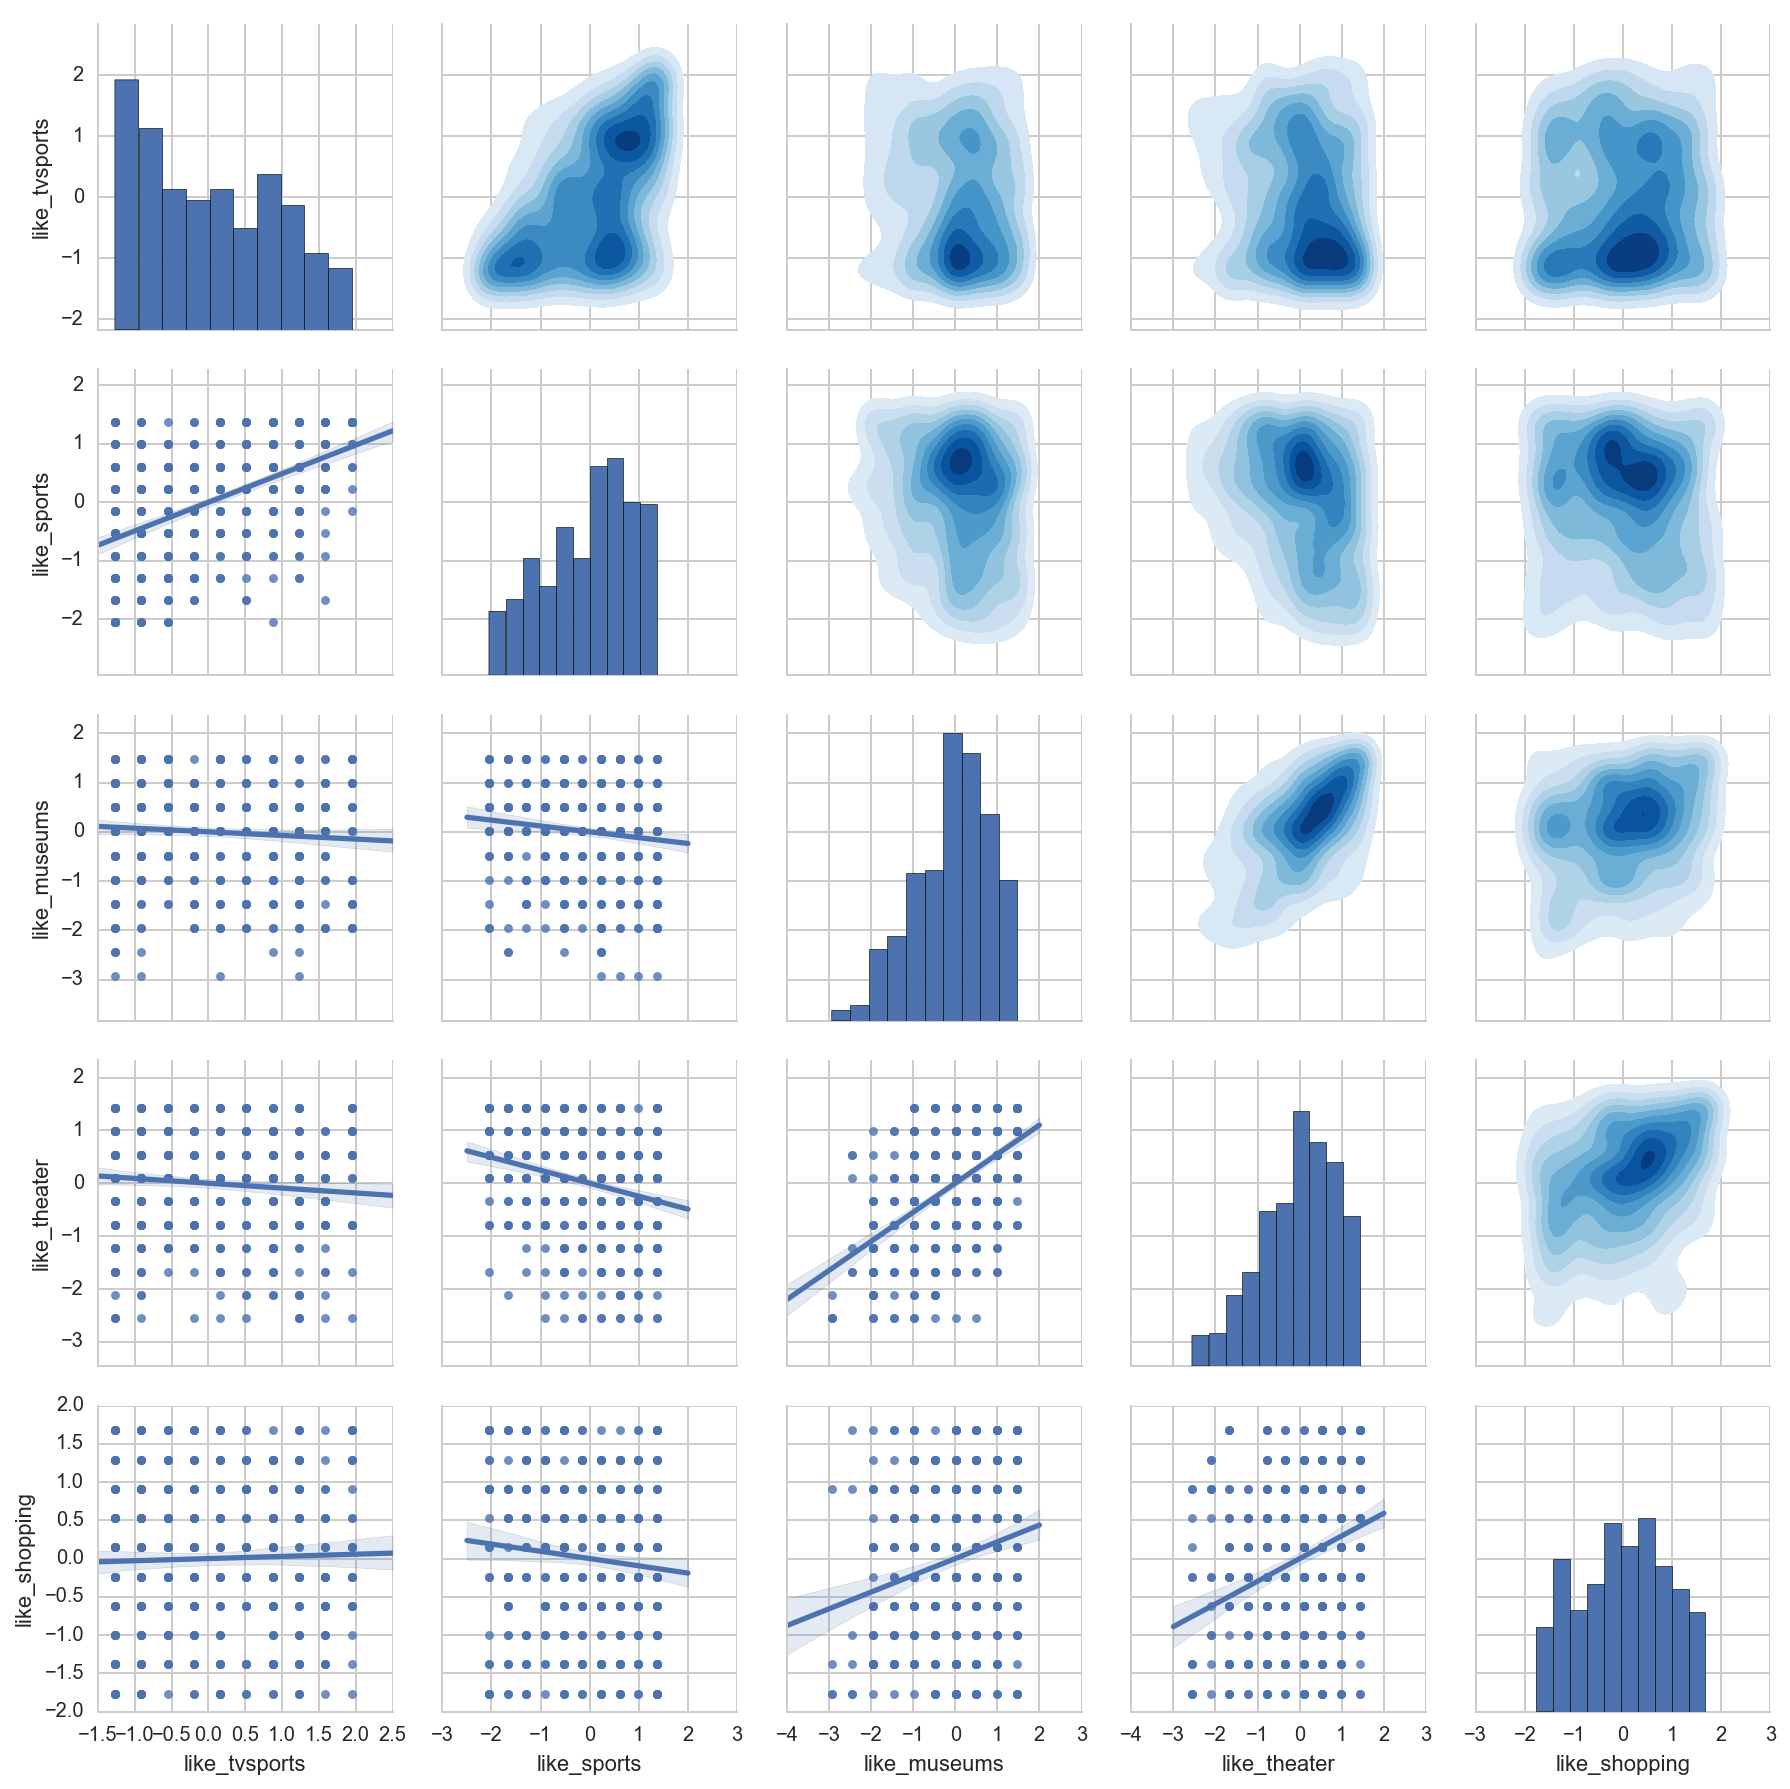

In [15]:
g = sns.PairGrid(sd_like)
g = g.map_lower(sns.regplot)
g = g.map_upper(sns.kdeplot, cmap="Blues", shade=True, shade_lowest=False)
g = g.map_diag(plt.hist)

plt.show()

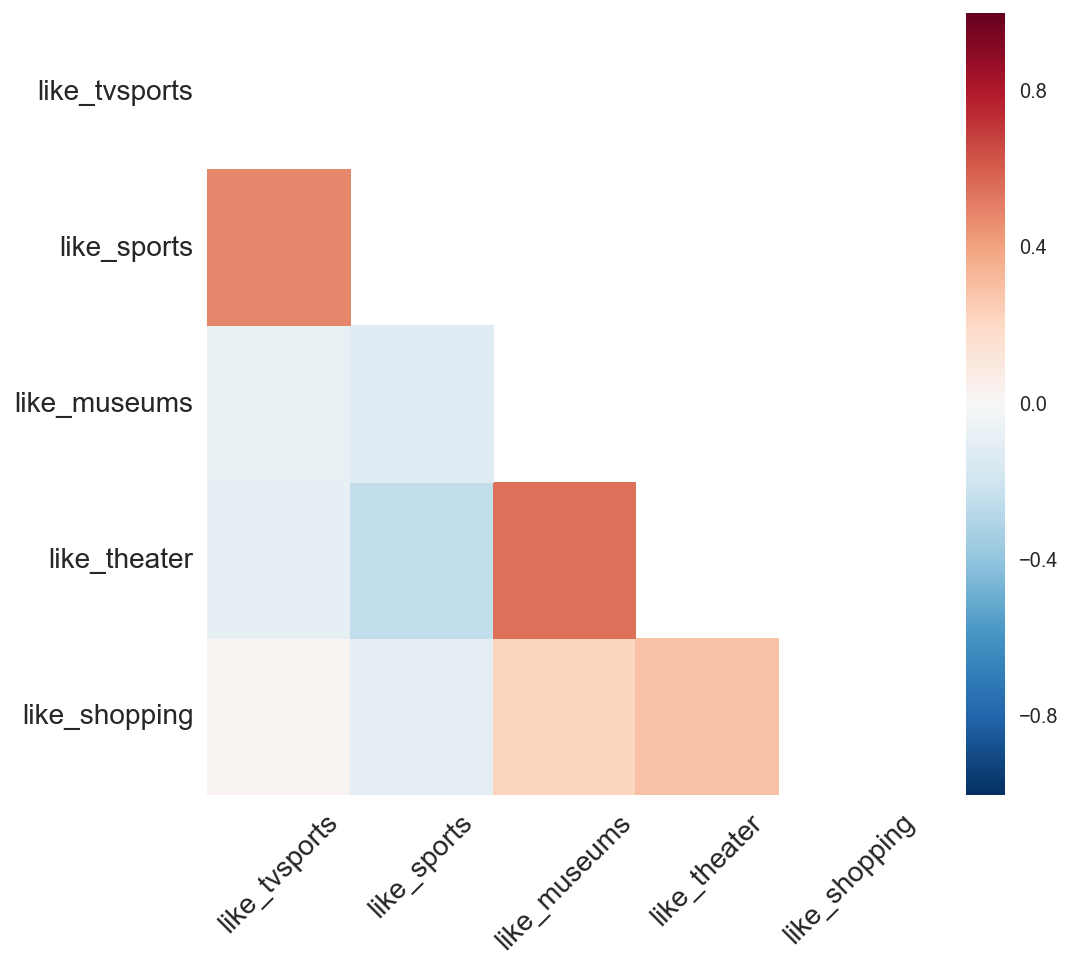

In [16]:
pref_corr = sd_like.corr()

mask = np.zeros_like(pref_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

fig, ax = plt.subplots(figsize=(8,7))

ax = sns.heatmap(pref_corr, mask=mask)

ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=14, rotation=45)
ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=14, rotation=0)

plt.show()

---

### Fit PCA on the subjective ratings.


In [16]:
from sklearn.decomposition import PCA

In [17]:
subjective_pca = PCA(n_components=5)
subjective_pca.fit(subjective.values)

PCA(copy=True, iterated_power='auto', n_components=5, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

---

### Look at principal component weighting vectors (eigenvectors)

The principal components, or eigenvectors, can be thought of as weightings on the original variables to transform them into the new feature space.

In [18]:
subj_components = subjective_pca.components_

In [19]:
print subjective_cols, '\n'
print '-------------------------------------\n'

for i, pc in enumerate(['PC1','PC2','PC3','PC4','PC5']):
    print pc, 'weighting vector:', subj_components[i]
    print '-------------------------------------\n'
        

['subjective_attractiveness', 'subjective_sincerity', 'subjective_intelligence', 'subjective_fun', 'subjective_ambition'] 

-------------------------------------

PC1 weighting vector: [-0.50189394 -0.31528977 -0.46707122 -0.48386412 -0.44318711]
-------------------------------------

PC2 weighting vector: [ 0.21825979 -0.90905995 -0.09768977  0.27400972  0.20334221]
-------------------------------------

PC3 weighting vector: [-0.40202351 -0.14438615  0.42289342 -0.48141404  0.63791176]
-------------------------------------

PC4 weighting vector: [ 0.34811874 -0.21377638  0.64842003 -0.36104737 -0.53132783]
-------------------------------------

PC5 weighting vector: [-0.64626278 -0.08749096  0.41594928  0.57330577 -0.27017855]
-------------------------------------



---

### Look at the eigenvalues and explained variance ratio

The eigenvalues are ordered such that the first components have the largest eigenvalues. The values and their normalized equivalent in the explained variance ratio attribute tell you how much of the variance in the original data is encapsulated in the new component variables.

In [20]:
subj_exp_var_eigenvals = subjective_pca.explained_variance_
subj_exp_var_pct = subjective_pca.explained_variance_ratio_

print 'eigenvalues:', subj_exp_var_eigenvals, '\n'
print 'explained variance pct:', subj_exp_var_pct

eigenvalues: [ 2.15245016  0.8859719   0.73548737  0.71963528  0.4972302 ] 

explained variance pct: [ 0.43128576  0.17752191  0.14736937  0.14419309  0.09962986]


---

### Transform the subjective data into principal component space

The transform function in the PCA will create you new component variable matrix.

In [21]:
subj_to_pcs = subjective_pca.transform(subjective.values)

---

### Compare a person's original subjective ratings to component variables

In [22]:
person1_original_ratings = subjective.iloc[0, :]
print person1_original_ratings

subjective_attractiveness   -0.785746
subjective_sincerity        -0.202528
subjective_intelligence     -0.353867
subjective_fun               0.193145
subjective_ambition         -0.323290
Name: 0, dtype: float64


In [23]:
person1_pcas = subj_to_pcs[0,:]
print person1_pcas

[ 0.67332     0.0343678  -0.10373029 -0.35765309  0.5764042 ]


---

### Create PC1 manually

To demonstrate how the the new principal component matrix is created from the original variable columns and the eigenvector weighting matrix, we'll create the first component PC1 manually.

#### 1. Pull out the eigenvector for PC1

In [24]:
confidence_weights = subj_components[0]

In [27]:
confidence_weights

array([-0.50189394, -0.31528977, -0.46707122, -0.48386412, -0.44318711])

#### 2. Create a dataframe showing the original values for the subjective variables for person 1

In [26]:
how_to_make_pc1 = pd.DataFrame({'person1_original':person1_original_ratings.values},
                               index=subjective.columns)
how_to_make_pc1

,person1_original
subjective_attractiveness,-0.785746
subjective_sincerity,-0.202528
subjective_intelligence,-0.353867
subjective_fun,0.193145
subjective_ambition,-0.323290


#### 3. Add the eigenvector for PC1: the weights to multiply each original variable by

Recall that each component is a linear combination of the original variables multiplied by a "weight" defined in the eigenvector of that component.

In [27]:
how_to_make_pc1['weights_to_make_pc1'] = confidence_weights
how_to_make_pc1

,person1_original,weights_to_make_pc1
subjective_attractiveness,-0.785746,0.501894
subjective_sincerity,-0.202528,0.315290
subjective_intelligence,-0.353867,0.467071
subjective_fun,0.193145,0.483864
subjective_ambition,-0.323290,0.443187


#### 4. Multiply the original variable values by the eigenvector values

These are the "pieces" of principal component 1 that will be added together to make the new value for that person.

In [28]:
how_to_make_pc1['pieces_of_pc1_value'] = how_to_make_pc1.person1_original * how_to_make_pc1.weights_to_make_pc1
how_to_make_pc1

,person1_original,weights_to_make_pc1,pieces_of_pc1_value
subjective_attractiveness,-0.785746,0.501894,-0.394361
subjective_sincerity,-0.202528,0.315290,-0.063855
subjective_intelligence,-0.353867,0.467071,-0.165281
subjective_fun,0.193145,0.483864,0.093456
subjective_ambition,-0.323290,0.443187,-0.143278


#### 5. Sum the original values multiplied by the eigenvector weights to get person 1's value for PC1

In [29]:
print 'sum of linear combinations of weights * original values for PC1:', np.sum(how_to_make_pc1.pieces_of_pc1_value)
print 'person 1s pca variables:', person1_pcas

sum of linear combinations of weights * original values for PC1: -0.673319996102
person 1s pca variables: [-0.67332    -0.0343678   0.10373029  0.35765309  0.5764042 ]


---

### Fit PCA on the preference data

In [30]:
sd_like.columns

Index([u'like_tvsports', u'like_sports', u'like_museums', u'like_theater',
       u'like_shopping'],
      dtype='object')

In [31]:
pref_pca = PCA(n_components=5)
pref_pca.fit(sd_like)

PCA(copy=True, n_components=5, whiten=False)

In [32]:
pref_comp = pref_pca.components_

In [33]:
print pref_pca.explained_variance_ratio_
print '-------------------------------------\n'

print sd_like.columns.values
print '-------------------------------------\n'

for i, pc in enumerate(['PC1','PC2','PC3','PC4','PC5']):
    print pc, 'weighting vector:', pref_comp[i]
    print '-------------------------------------\n'

[ 0.38165737  0.26823578  0.16433237  0.10400236  0.08177213]
-------------------------------------

['like_tvsports' 'like_sports' 'like_museums' 'like_theater'
 'like_shopping']
-------------------------------------

PC1 weighting vector: [ 0.32075311  0.43067013 -0.51328922 -0.57313168 -0.34596956]
-------------------------------------

PC2 weighting vector: [-0.64992163 -0.53219199 -0.3241323  -0.26506368 -0.34504067]
-------------------------------------

PC3 weighting vector: [  2.08050622e-05  -1.60309917e-01  -4.54907251e-01  -2.24216382e-01
   8.46809977e-01]
-------------------------------------

PC4 weighting vector: [-0.62245171  0.58748868  0.33822794 -0.33335442  0.20466461]
-------------------------------------

PC5 weighting vector: [ 0.29542035 -0.40056549  0.55689648 -0.66322181  0.0477206 ]
-------------------------------------



In [34]:
pref_pcs = pref_pca.transform(sd_like)

In [35]:
pref_pcs[0:3]

array([[ 2.79038922,  1.37876855,  2.52125503,  1.19803181, -0.55922863],
       [-1.32191571,  1.20239102, -1.0868018 , -0.55530336, -0.176345  ],
       [-0.03460909, -0.13788089,  1.39984296, -1.69857826,  0.31643736]])

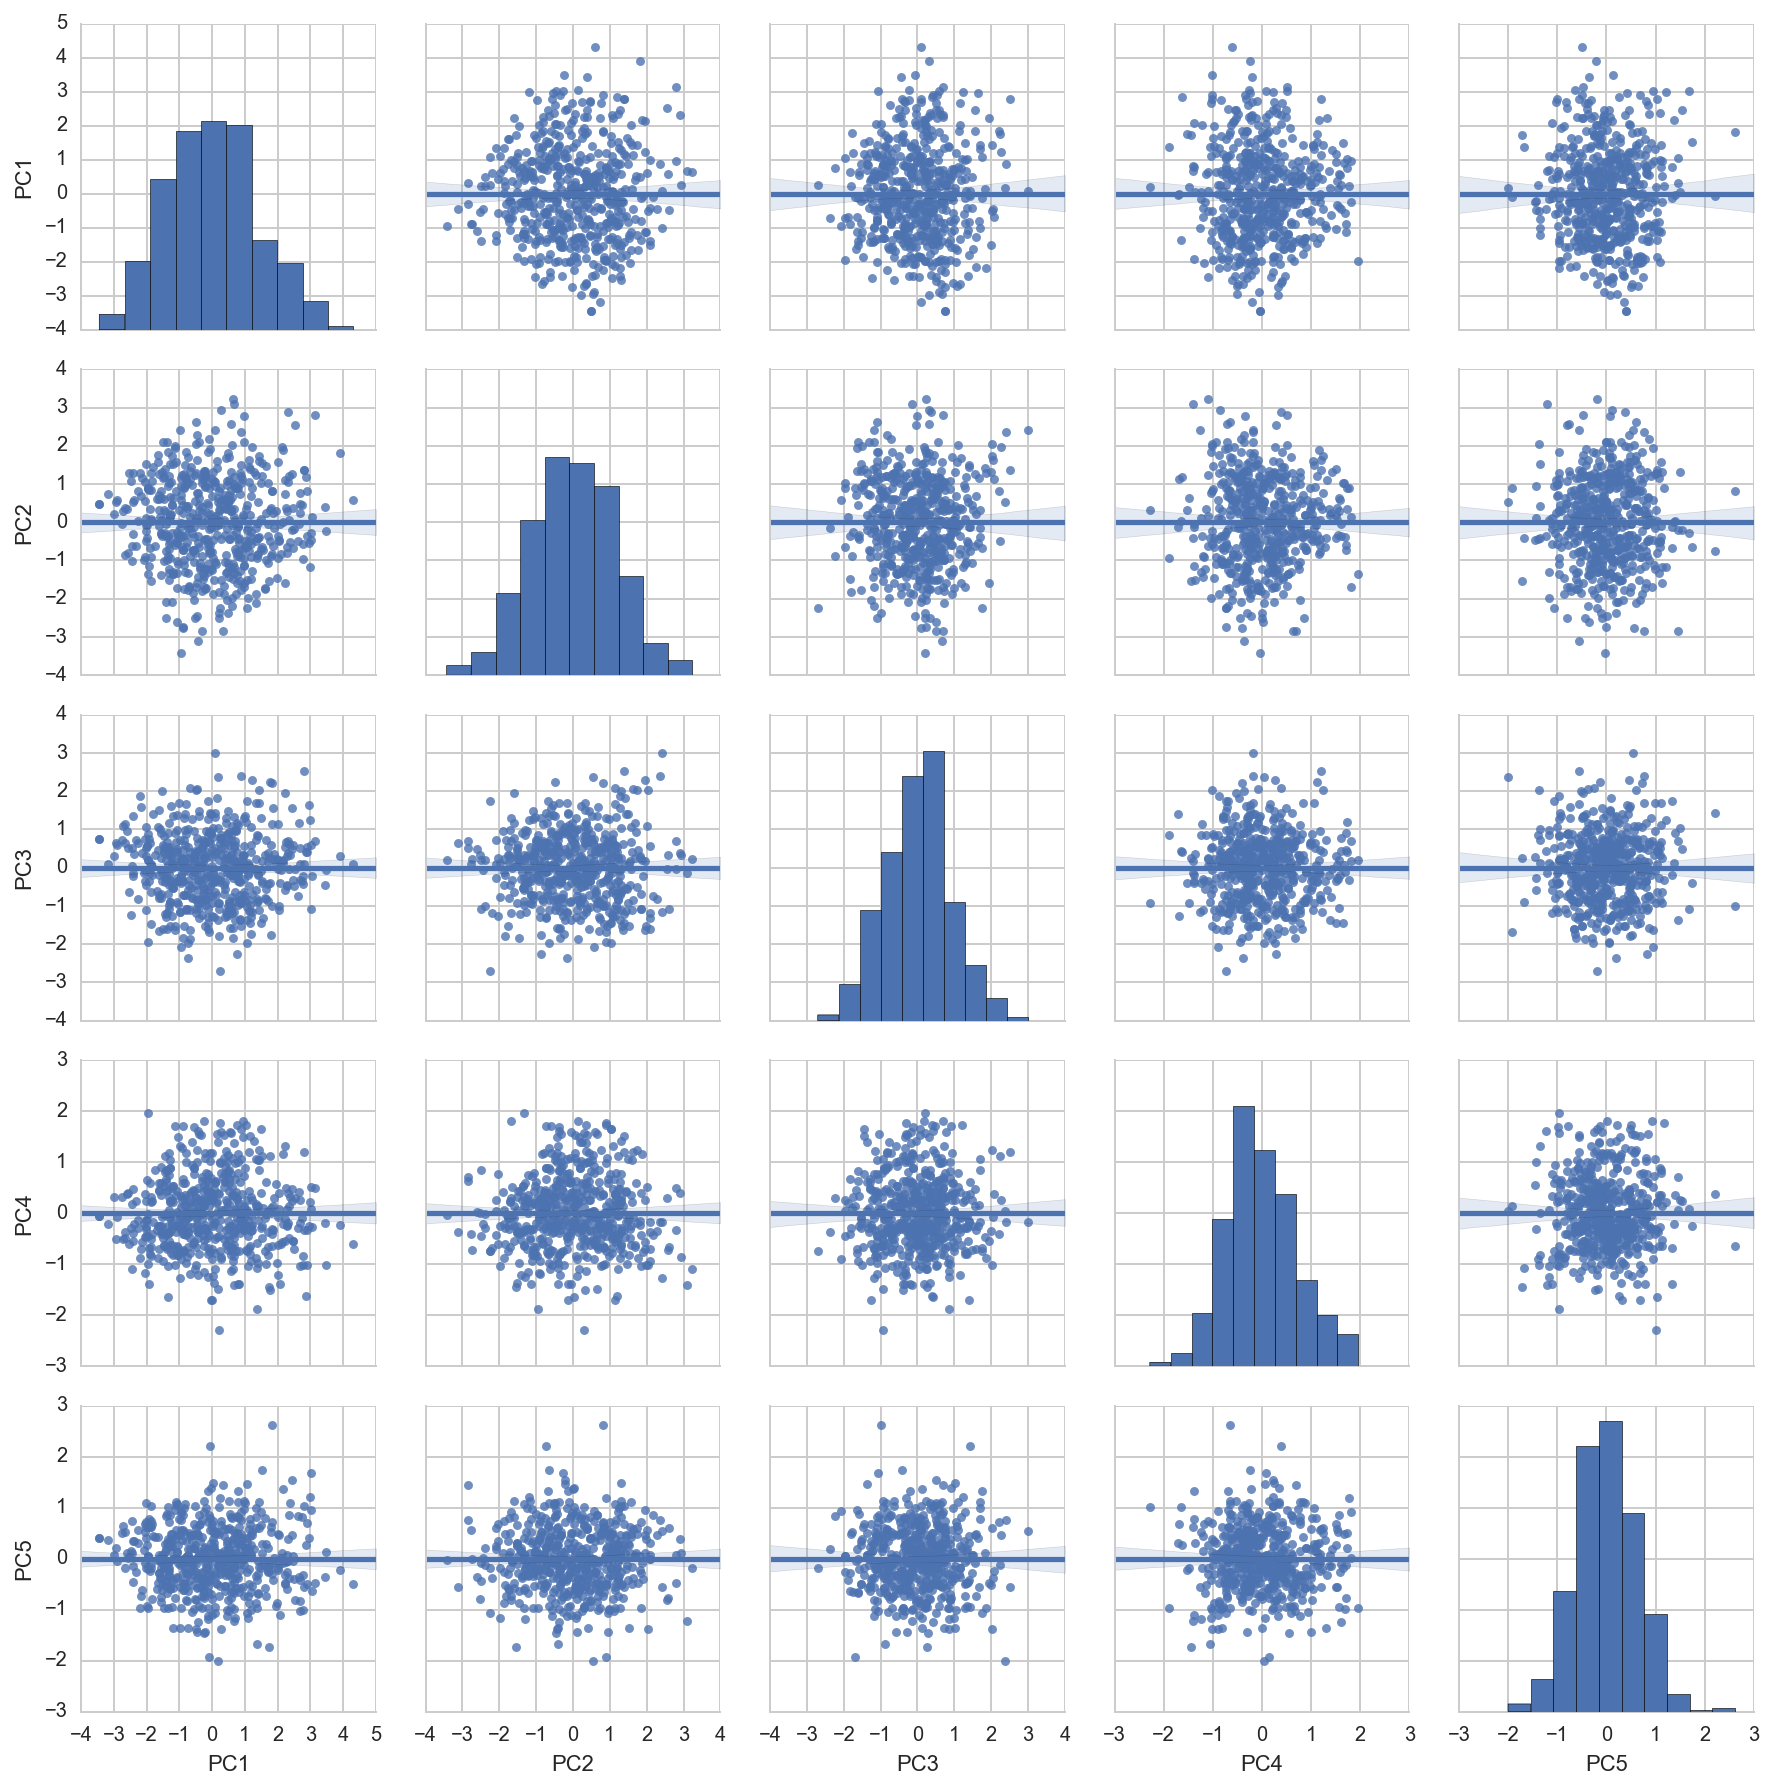

In [36]:
sns.pairplot(pd.DataFrame(pref_pcs, columns=['PC1','PC2','PC3','PC4','PC5']), kind='reg')

---

### Predict "like_reading" from original and from PCA

In [37]:
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import cross_val_score
reading = sd['like_reading'].values


#### Linear regression cross-validated on original variables:

In [38]:
linreg = LinearRegression()
original_scores = cross_val_score(linreg, sd_like.values, reading, cv=10)
print sd_like.columns.values
print original_scores
print np.mean(original_scores)

['like_tvsports' 'like_sports' 'like_museums' 'like_theater'
 'like_shopping']
[ 0.0572145  -0.10260757  0.20705881 -0.02153198  0.05578277  0.03202637
  0.14161886  0.22415082  0.116138    0.16539735]
0.0875247930476


In [39]:
linreg.fit(sd_like.values, reading)
for coef, var in zip(linreg.coef_, sd_like.columns):
    print var, coef

like_tvsports -0.179136364202
like_sports -0.12553557523
like_museums 0.64256639574
like_theater 0.155959975503
like_shopping -0.199332736006


#### Linear regression on first principal component

In [40]:
pref_pcs[:,0:1].shape

(542, 1)

In [41]:
pca_linreg = LinearRegression()
pca_scores = cross_val_score(pca_linreg, pref_pcs[:,0:1], reading, cv=10)
print pca_scores
print np.mean(pca_scores)

[-0.02858    -0.01250406  0.24228217 -0.06029094 -0.04921511  0.03747336
  0.05234334  0.15589976  0.08338934  0.08788686]
0.0508684728386


#### Linear regression on first 3 principal components

In [42]:
pca_linreg = LinearRegression()
pca_scores = cross_val_score(pca_linreg, pref_pcs[:,0:3], reading, cv=10)
print pca_scores
print np.mean(pca_scores)

[ 0.01553468 -0.09745245  0.24144348 -0.04271056  0.07264787  0.05968088
  0.15983856  0.22683943  0.08212394  0.15709538]
0.0875041220343
